<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/Avengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import nltk
from PIL import Image
import numpy as np
%matplotlib inline

In [5]:
data=pd.read_csv('/avengers.csv',encoding = "latin-1")
data.drop("URL",axis=1,inplace=True)
data

,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Chechking null values 
def about_data(df):
    df.info()
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [8]:
about_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name/Alias                   163 non-null    object
 1   Appearances                  173 non-null    int64 
 2   Current?                     173 non-null    object
 3   Gender                       173 non-null    object
 4   Probationary Introl          15 non-null     object
 5   Full/Reserve Avengers Intro  159 non-null    object
 6   Year                         173 non-null    int64 
 7   Years since joining          173 non-null    int64 
 8   Honorary                     173 non-null    object
 9   Death1                       173 non-null    object
 10  Return1                      69 non-null     object
 11  Death2                       17 non-null     object
 12  Return2                      16 non-null     object
 13  Death3                       2 non-

,columns,total missing,ration of missing
0,Name/Alias,10,0.057803
1,Appearances,0,0.000000
2,Current?,0,0.000000
3,Gender,0,0.000000
4,Probationary Introl,158,0.913295
5,Full/Reserve Avengers Intro,14,0.080925
6,Year,0,0.000000
7,Years since joining,0,0.000000
8,Honorary,0,0.000000
9,Death1,0,0.000000


As we can see there are lots of null values for Probationary Introl. That is a good idea to drop that columns. Ratio of missing value should be under 0.25 at least. However, there are some columns that have ratio of missing value below 0.25 but that columns are not necessary. Death and Return columns will be filled in the future

In [9]:
data.drop('Probationary Introl',axis=1,inplace=True)

In [10]:
#Null values
data['Death1'].fillna('Never Happen', inplace = True)
data['Death2'].fillna('Never Happen', inplace = True) 
data['Death3'].fillna('Never Happen', inplace = True) 
data['Death4'].fillna('Never Happen', inplace = True) 
data['Death5'].fillna('Never Happen', inplace = True) 
data['Return1'].fillna('Never Happen', inplace = True)
data['Return2'].fillna('Never Happen', inplace = True) 
data['Return3'].fillna('Never Happen', inplace = True) 
data['Return4'].fillna('Never Happen', inplace = True) 
data['Return5'].fillna('Never Happen', inplace = True) 
data["Full/Reserve Avengers Intro"].fillna('Unknown', inplace = True) 

In [11]:
data.Notes = data.Notes.str.replace("_"," ")
data.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Fear Itself brought back because that'...


<Axes: xlabel='Gender', ylabel='count'>

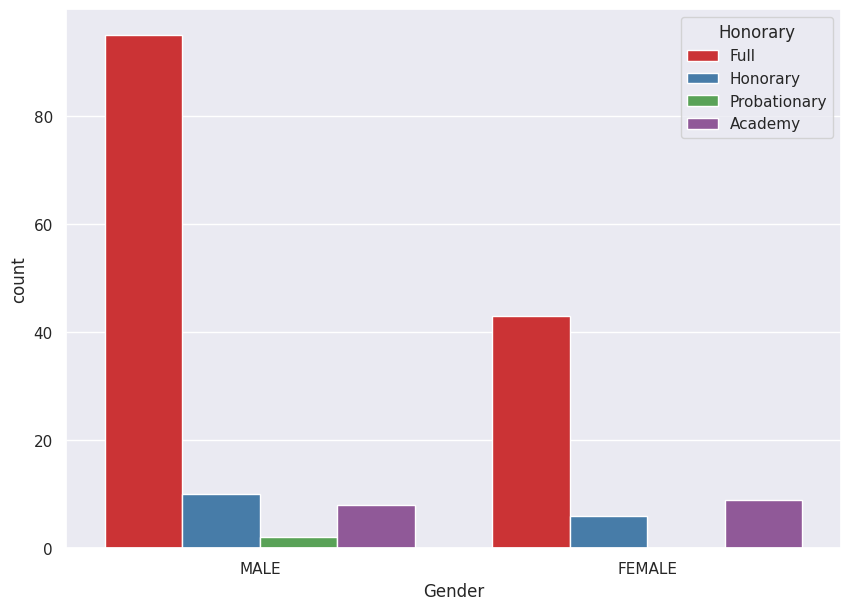

In [12]:
#status of the avenger generally is full for both gender

sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Gender",hue="Honorary",palette='Set1')

<Axes: xlabel='Current?', ylabel='count'>

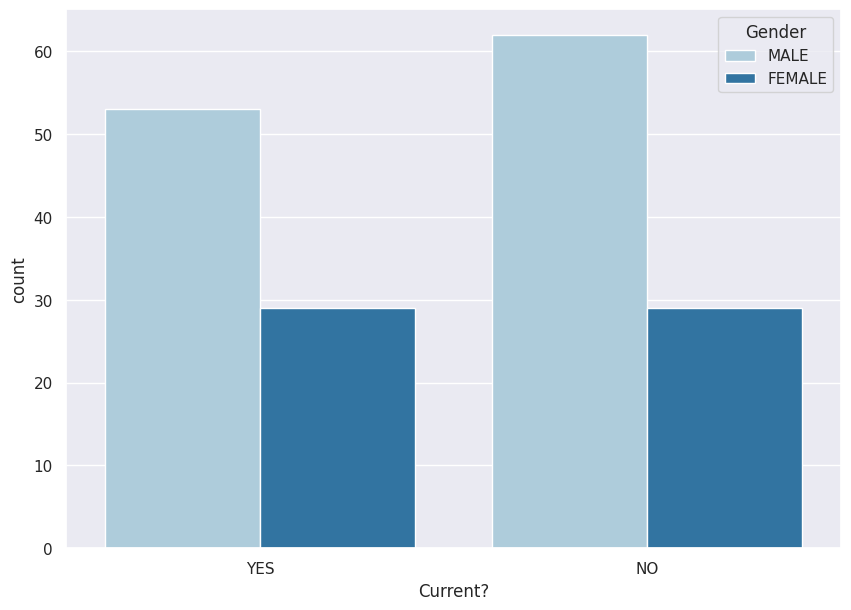

In [13]:
#Gender discrimination of heroes with and without active group members
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Current?",hue="Gender",palette='Paired')

<ipython-input-14-1c9f0988f762>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, kde=False,bins=30)


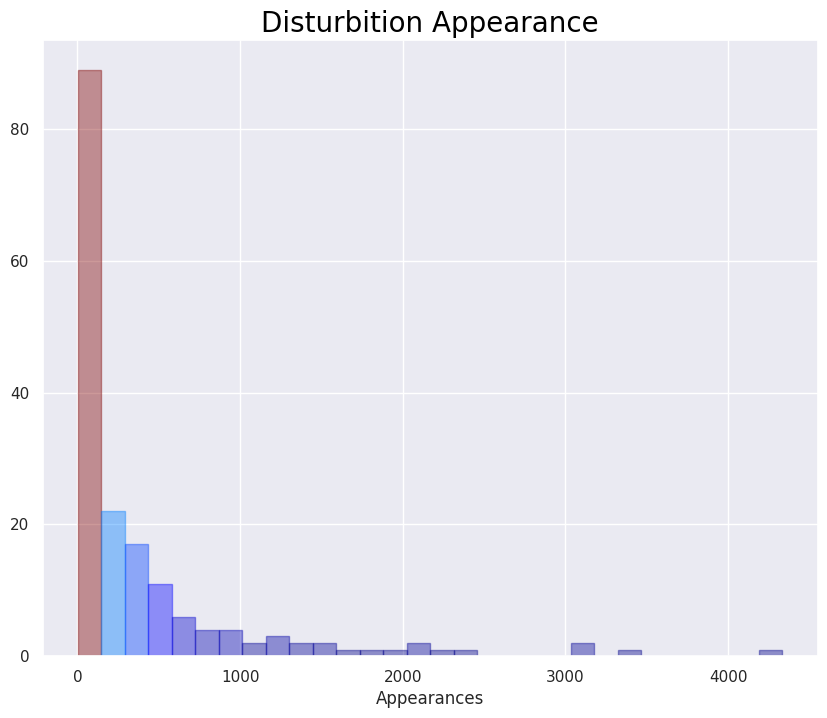

In [14]:
def disturbition(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')
disturbition(data.Appearances,"Disturbition Appearance")

<Axes: xlabel='Current?', ylabel='Years since joining'>

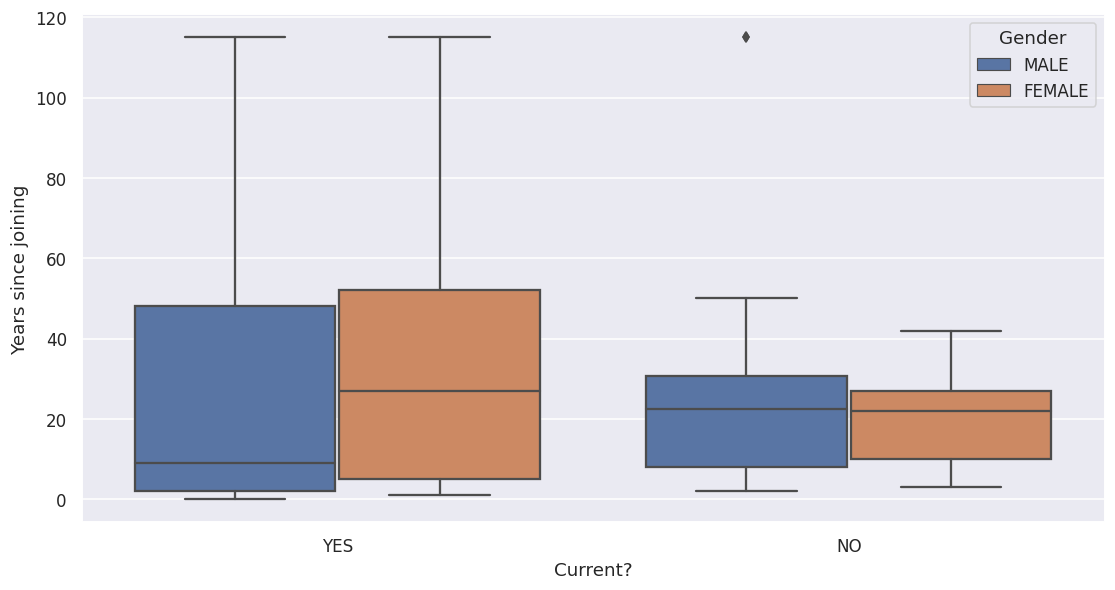

In [15]:
#Discrimination by gender by looking at the year since joining in which heroes with and without an active group participated.
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Years since joining',x='Current?',hue="Gender",data=data)

<Axes: xlabel='Current?', ylabel='Appearances'>

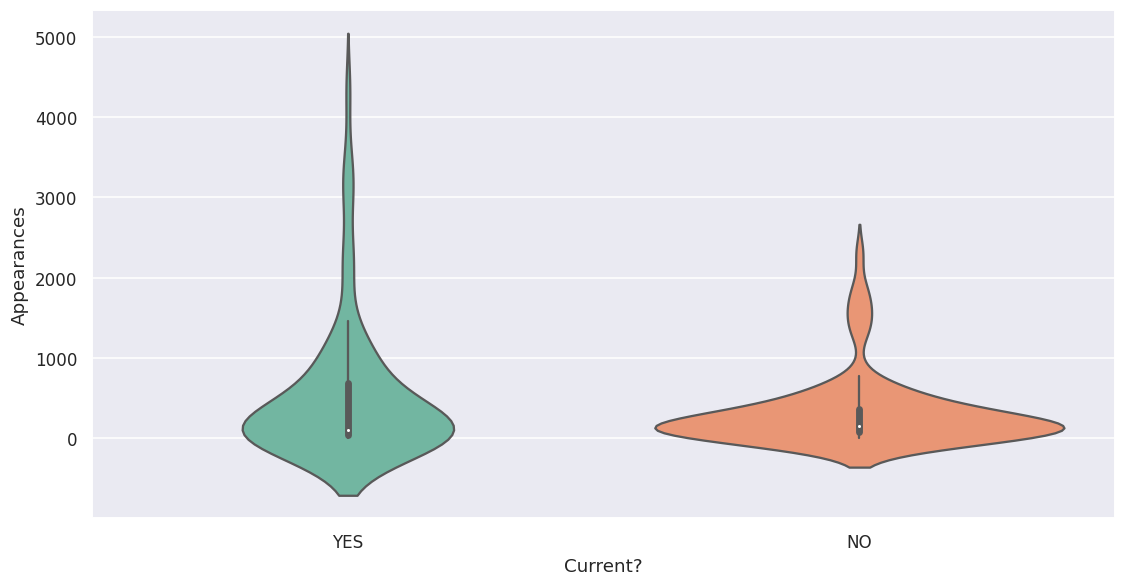

In [16]:
plt.figure(figsize=(12,6),dpi=110)
sns.violinplot(y='Appearances',x='Current?',data=data,palette='Set2')

<Figure size 1320x660 with 0 Axes>

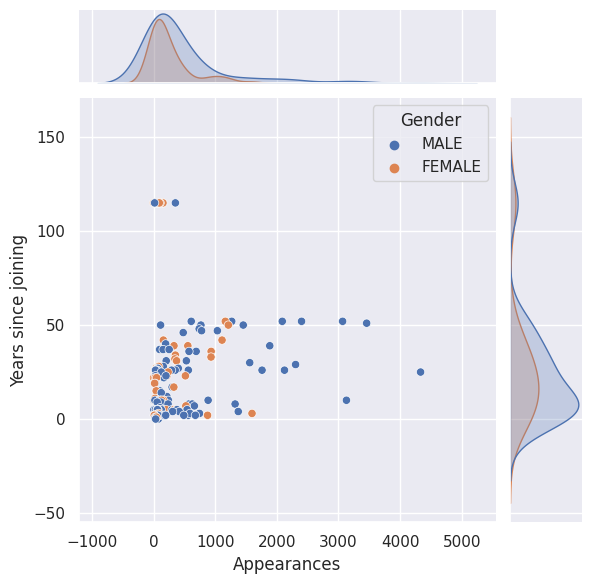

In [17]:
plt.figure(figsize=(12,6),dpi=110)
sns.jointplot(x='Appearances',y='Years since joining',data=data,hue="Gender")

Text(0.5, 1.0, 'Honored Actors & Actresses')

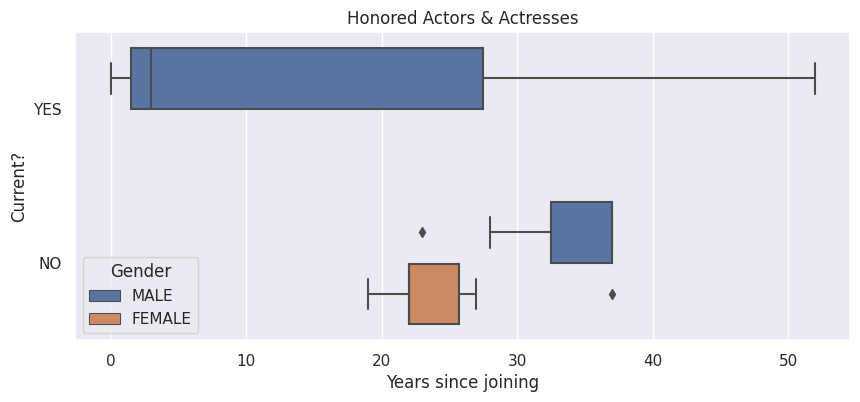

In [18]:
#there are no honored actresses who currently active on an avengers affiliated team
is_honory = data[data['Honorary']=='Honorary']
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x='Years since joining',y='Current?',data=is_honory,orient='h',hue="Gender")
plt.title("Honored Actors & Actresses")

In [19]:
#Lets Looking for which charachter is still alive and which is death

still_alive = data[data['Notes'].isnull()]
death = data[data['Notes'].notnull()]
death.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Fear Itself brought back because that'...


<Axes: xlabel='Gender', ylabel='count'>

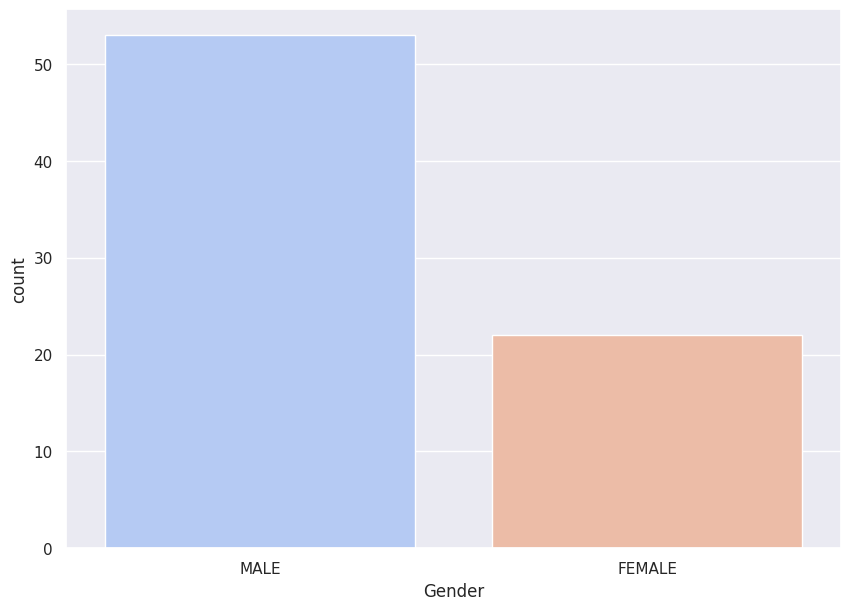

In [20]:
#When we look at the heroes who died, the male heroes lost more than the female heroes. Is it more risky to be a male hero in Avengers?
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = death, x="Gender",palette='coolwarm')

<Axes: xlabel='Gender', ylabel='Appearances'>

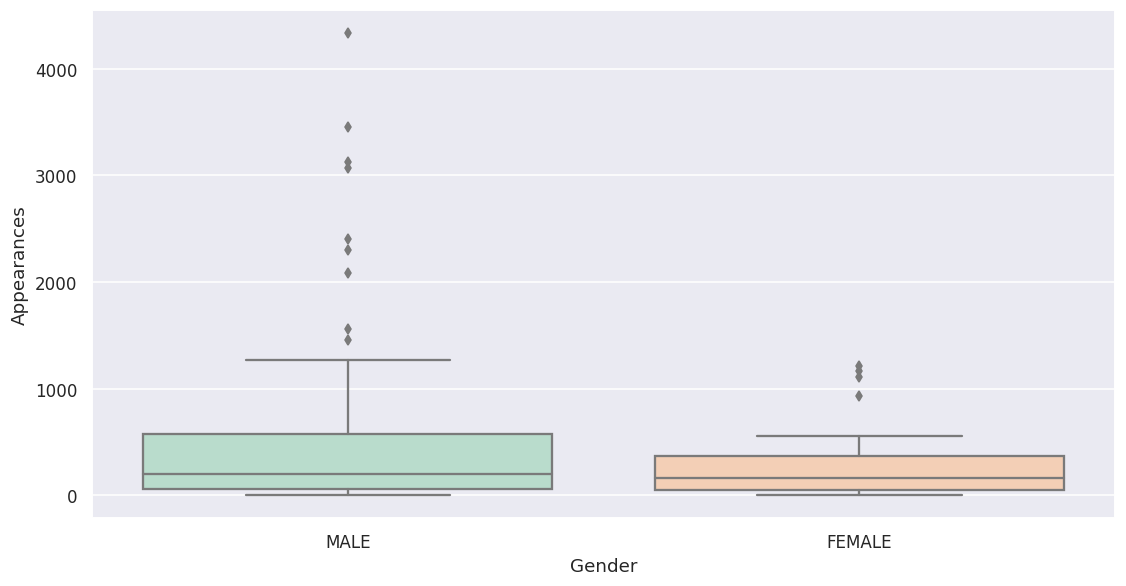

In [21]:
#When we look at the heroes who died, male heroes are more compared to the heroines who have been the subject of books.
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=death,palette='Pastel2')

In [22]:
still_alive

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
5,Richard Milhouse Jones,612,YES,MALE,Sep-63,1963,52,Honorary,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
11,Heracles,741,YES,MALE,Oct-67,1967,48,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
12,T'Challa,780,NO,MALE,May-68,1968,47,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
14,Dane Whitman,482,NO,MALE,Dec-69,1969,46,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
17,Henry P. McCoy,1886,NO,MALE,Sep-76,1976,39,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Eric Brooks,198,YES,MALE,13-Nov,2013,2,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
169,Adam Brashear,29,YES,MALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
170,Victor Alvarez,45,YES,MALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
171,Ava Ayala,49,YES,FEMALE,14-Jan,2014,1,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN


<Axes: xlabel='Gender', ylabel='count'>

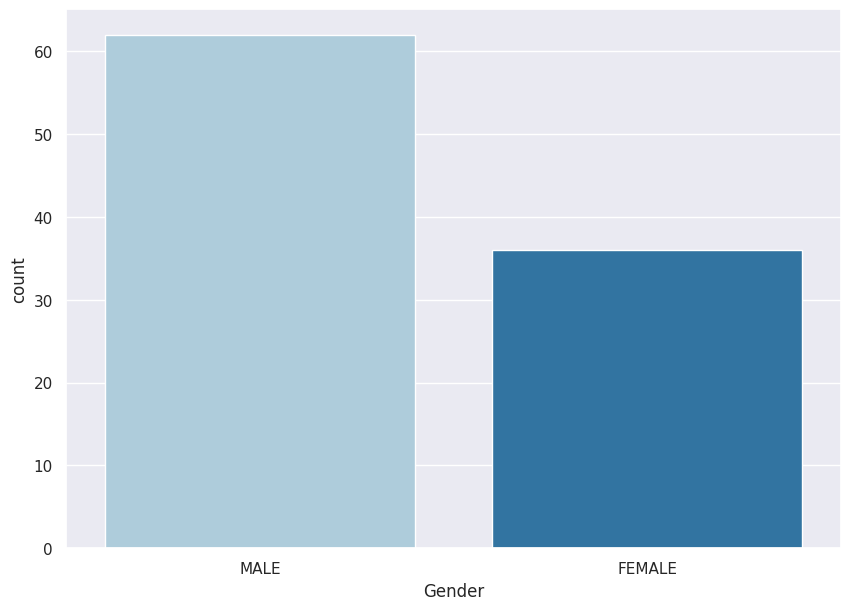

In [23]:
#When we look at the heroes who still alive , same result but we can say that avengers have more male heros than female heros
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = still_alive, x="Gender",palette='Paired')

<Axes: xlabel='Gender', ylabel='Appearances'>

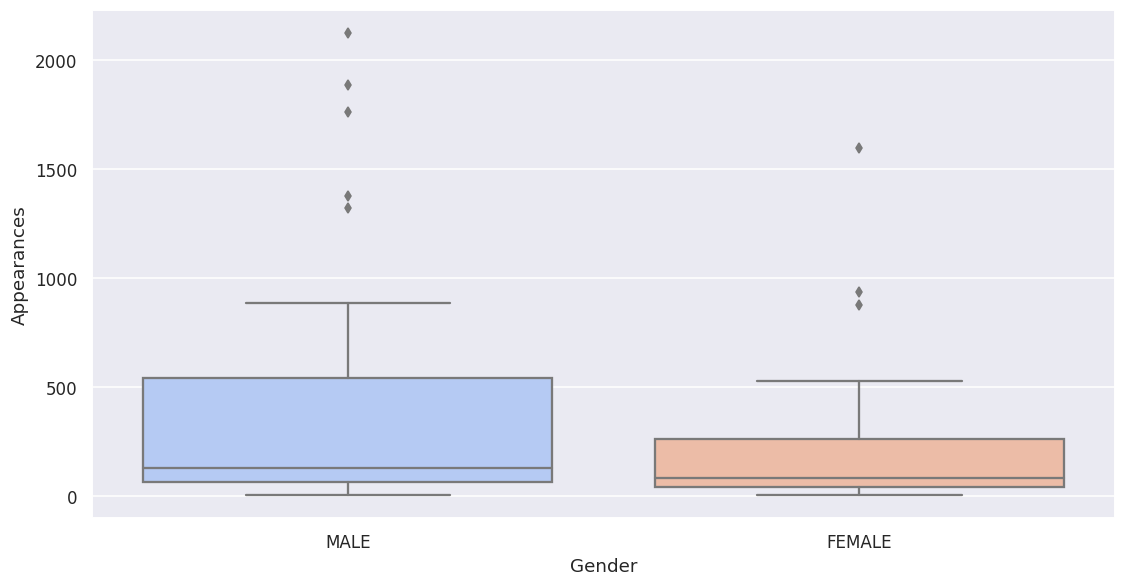

In [24]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Appearances',x='Gender',data=still_alive,palette='coolwarm')